In [61]:
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Now, for the fun part.... Models and Predictions

In [3]:
filename = '../../pickled_data/df_to_open_in_note_2'
infile = open(filename, 'rb')
df = pickle.load(infile)

In [4]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,-0.673345,2,0,5,4.132122,4.007515,1.633154,1.625311,1.156881,7.520240
1,0.438255,1,5,4,4.152771,4.094511,1.989243,1.993339,1.539015,9.226608
2,0.285179,4,6,3,4.122446,4.094511,1.940179,1.948763,1.463255,8.614866
3,0.190620,2,5,2,4.128907,4.007515,1.922788,1.916923,1.444563,8.551403
4,0.553885,3,5,2,4.114311,4.094511,2.038620,2.036012,1.547563,9.301735


### We separate target `y` from features `X`

In [5]:
X = df.iloc[:,:-4]
y = df.iloc[:,-1]

In [7]:
print(X.head())
y.head()

      carat  cut  color  clarity     depth     table
0 -0.673345    2      0        5  4.132122  4.007515
1  0.438255    1      5        4  4.152771  4.094511
2  0.285179    4      6        3  4.122446  4.094511
3  0.190620    2      5        2  4.128907  4.007515
4  0.553885    3      5        2  4.114311  4.094511


0    7.520240
1    9.226608
2    8.614866
3    8.551403
4    9.301735
Name: price, dtype: float64

The `train_test_split` is set to split on 0.7 for train and 0.3 for test and the random state gives us concrete number to reference a random selection of rows so we get the same set of random each time we run the function. Apparently, `42` is just a reference to **Hitchikers's Guided to the Galaxy**. I should read it some day.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear Regression

<br>1) Import LinearRegression class from Sci-kit learn
<br>2) Create an object of LinearRegression model
<br>3) Fit the model to X_train and y_train
<br>4) Make predictions

In [12]:
lr = LinearRegression()

In [13]:
lr.fit(X_train,y_train)

LinearRegression()

In [14]:
y_pred = lr.predict(X_test)

In [44]:
print("Coef: ",lr.coef_)
print("MSE:  %.2f" %mean_squared_error(y_test, y_pred))
print("Coef of Determ (1 is perfect): %.2f" %r2_score(y_test, y_pred))
print("RMSE: %.2f" %math.sqrt(mean_squared_error(y_test, y_pred)))

Coef:  [ 1.79127871  0.00823043 -0.06108836  0.06478575 -1.18176124 -0.90533894]
MSE:  0.02
Coef of Determ (1 is perfect): 0.98
RMSE: 0.13


#### This could be great or terrible. It is very well fit...but...is it too fit....and it knows it.

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


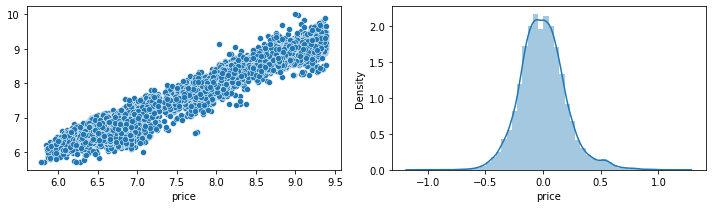

In [34]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,3))
sns.scatterplot(x=y_test,y=y_pred, ax=ax1)
sns.distplot((y_test-y_pred),bins=50, ax=ax2)
plt.tight_layout()

In [29]:
# convert prices and predictions back to exp
y_pred2 = np.exp(y_pred)
y_test2 = np.exp(y_test)

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


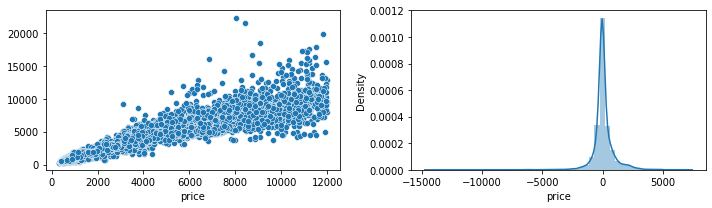

In [35]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,3))
sns.scatterplot(x=y_test2,y=y_pred2, ax=ax1)
sns.distplot((y_test2-y_pred2),bins=50, ax=ax2)
plt.tight_layout()

# KNN

In [50]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

In [51]:
print("Coef: ",lr.coef_)
print("MSE:  %.2f" %mean_squared_error(y_test, y_pred))
print("Coef of Determ (1 is perfect): %.2f" %r2_score(y_test, y_pred))
print("RMSE: %.2f" %math.sqrt(mean_squared_error(y_test, y_pred)))

Coef:  [ 1.79127871  0.00823043 -0.06108836  0.06478575 -1.18176124 -0.90533894]
MSE:  0.02
Coef of Determ (1 is perfect): 0.98
RMSE: 0.13


/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


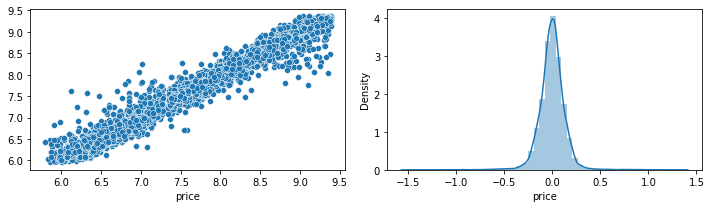

In [52]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,3))
sns.scatterplot(x=y_test,y=y_pred, ax=ax1)
sns.distplot((y_test-y_pred),bins=50, ax=ax2)
plt.tight_layout()

In [53]:
# convert prices and predictions back to exp
y_pred2 = np.exp(y_pred)
y_test2 = np.exp(y_test)

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


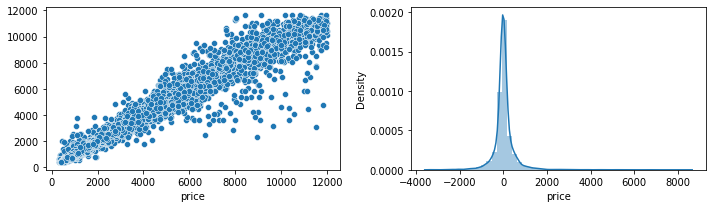

In [54]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,3))
sns.scatterplot(x=y_test2,y=y_pred2, ax=ax1)
sns.distplot((y_test2-y_pred2),bins=50, ax=ax2)
plt.tight_layout()

# SVR

In [56]:
svm = SVR()
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)

In [57]:
print("Coef: ",lr.coef_)
print("MSE:  %.2f" %mean_squared_error(y_test, y_pred))
print("Coef of Determ (1 is perfect): %.2f" %r2_score(y_test, y_pred))
print("RMSE: %.2f" %math.sqrt(mean_squared_error(y_test, y_pred)))

Coef:  [ 1.79127871  0.00823043 -0.06108836  0.06478575 -1.18176124 -0.90533894]
MSE:  0.03
Coef of Determ (1 is perfect): 0.97
RMSE: 0.16


/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


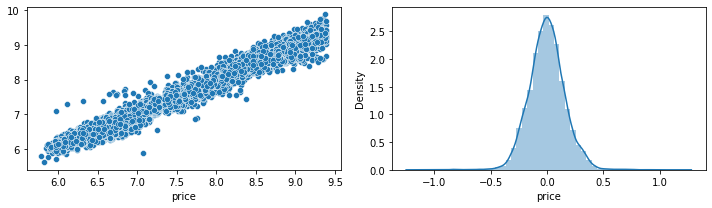

In [58]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,3))
sns.scatterplot(x=y_test,y=y_pred, ax=ax1)
sns.distplot((y_test-y_pred),bins=50, ax=ax2)
plt.tight_layout()

In [59]:
# convert prices and predictions back to exp
y_pred2 = np.exp(y_pred)
y_test2 = np.exp(y_test)

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


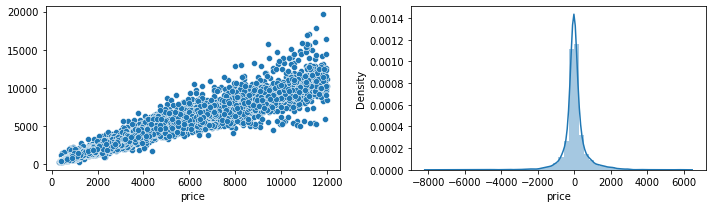

In [60]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,3))
sns.scatterplot(x=y_test2,y=y_pred2, ax=ax1)
sns.distplot((y_test2-y_pred2),bins=50, ax=ax2)
plt.tight_layout()

# Random Forest

In [66]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [67]:
print("Coef: ",lr.coef_)
print("MSE:  %.2f" %mean_squared_error(y_test, y_pred))
print("Coef of Determ (1 is perfect): %.2f" %r2_score(y_test, y_pred))
print("RMSE: %.2f" %math.sqrt(mean_squared_error(y_test, y_pred)))

Coef:  [ 1.79127871  0.00823043 -0.06108836  0.06478575 -1.18176124 -0.90533894]
MSE:  0.01
Coef of Determ (1 is perfect): 0.99
RMSE: 0.11


/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


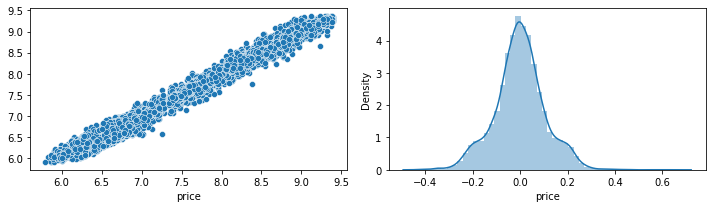

In [68]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,3))
sns.scatterplot(x=y_test,y=y_pred, ax=ax1)
sns.distplot((y_test-y_pred),bins=50, ax=ax2)
plt.tight_layout()

In [69]:
# convert prices and predictions back to exp
y_pred2 = np.exp(y_pred)
y_test2 = np.exp(y_test)

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


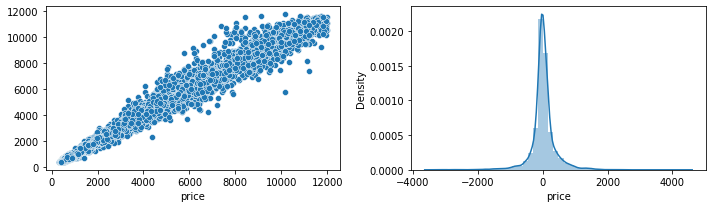

In [70]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,3))
sns.scatterplot(x=y_test2,y=y_pred2, ax=ax1)
sns.distplot((y_test2-y_pred2),bins=50, ax=ax2)
plt.tight_layout()